In [31]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

In [3]:
def load_orl_dataset(dataset_path):
  images,labels=[],[]
  for person_id in range(1,41):
    person_path=os.path.join(dataset_path,f's{person_id}')
    for image_id in range(1,11):
      img_path=os.path.join(person_path,f'{image_id}.pgm')
      img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
      img=cv2.resize(img,(64,64))
      images.append(img)
      labels.append(person_id-1)

  images=np.array(images,dtype=np.float32)/255.0
  labels=np.array(labels)
  return images,labels

In [4]:
dataset_path='drive/MyDrive/ORL'
X,y=load_orl_dataset(dataset_path)

In [5]:
X=X.reshape(-1,64,64,1)
y=keras.utils.to_categorical(y,num_classes=40)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
def create_cnn_model():
  model=keras.Sequential([
      layers.Conv2D(32,(3,3),activation='relu',input_shape=(64,64,1)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64,(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(128,(3,3),activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(128,activation='relu'),
      layers.Dense(40,activation='softmax')
  ])
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [21]:
model=create_cnn_model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 40)                  │           5,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687,784 (2.62 MB)

 Trainable params: 687,784 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history=model.fit(X_train,y_train,epochs=20,batch_size=16,validation_data=(X_test,y_test))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.0190 - loss: 3.7083 - val_accuracy: 0.0000e+00 - val_loss: 3.6926
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0130 - loss: 3.6887 - val_accuracy: 0.0125 - val_loss: 3.7090
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0520 - loss: 3.6759 - val_accuracy: 0.0000e+00 - val_loss: 3.7146
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0717 - loss: 3.6119 - val_accuracy: 0.0250 - val_loss: 3.6704
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1353 - loss: 3.2578 - val_accuracy: 0.2375 - val_loss: 3.0924
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4610 - loss: 2.1332 - val_accuracy: 0.4875 - val_loss: 1.8764
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7694 - loss: 0.9517 - val_accuracy: 0.7125 - val_loss: 1.0154
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8796 - loss: 0.4283 - val_accuracy: 0.8375 -

In [23]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(f'Test Accuracy: {test_acc*100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9555 - loss: 0.2519
Test Accuracy: 95.00%


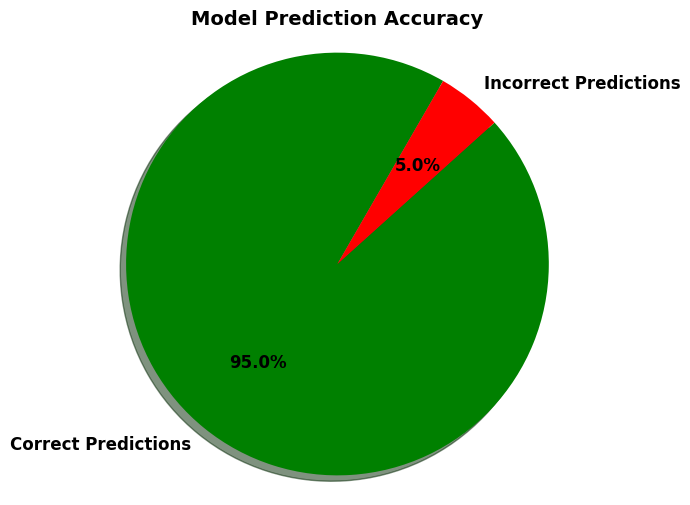

In [47]:
import matplotlib.pyplot as plt

correct_predictions = test_acc * len(y_test)
incorrect_predictions = len(y_test) - correct_predictions

labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_predictions, incorrect_predictions]
colors = ['green', 'red']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=60, textprops={'fontsize': 12, 'weight': 'bold'})
plt.title('Model Prediction Accuracy', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()


In [ ]:
model.save('orl.h5')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
